#EDA - 1
#About - Dataset:

The dataset provided focuses on used bikes, capturing various attributes to analyze the second-hand bike market. This dataset helps understand factors influencing resale prices, usage patterns, and market trends for used bikes.

#Title: Bike Details Dataset

**Source:**

The dataset is available on Kaggle, simulating data commonly observed in real-world online bike resale platforms.

**Description:**

The dataset comprises 1061 records of used bike listings. These records include details about the bike's brand and model, selling price, kilometers driven, ownership history, and other attributes. It is particularly useful for
resale value prediction, market analysis, and understanding buyer preferences.

The dataset consists of 7 features, combining both numeric and categorical data, offering a comprehensive view of the second-hand bike market.

#Title: Bike Details Dataset

**. =name:** Brand and model name of the bike (Categorical, e.g., "Royal Enfield Classic 350", "Honda Dio").

**. selling_price:** Listed selling price in INR (Numeric, e.g., 175000, 45000).

**. year:** Manufacturing year of the bike (Numeric, e.g., 2019, 2015).

**. seller_type:** Seller category, either "Individual" or "Dealer" (Categorical).

**. owner:** Ownership history, e.g., "1st owner", "2nd owner" (Categorical).

**. km_driven:** Total kilometers driven (Numeric, in km, e.g., 12000, 23000).

**. ex_showroom_price:** Original showroom price in INR (Numeric, e.g., 148114.0, 89643.0, etc,.).

#Questions:

1. What is the range of selling prices in the dataset?

2. What is the median selling price for bikes in the dataset?

3. What is the most common seller type?

4. How many bikes have driven more than 50,000 kilometers?

5. What is the average km_driven value for each ownership type?

6. What proportion of bikes are from the year 2015 or older?

7. What is the trend of missing values across the dataset?

8. What is the highest ex_showroom_price recorded, and for which bike?

9. What is the total number of bikes listed by each seller type?

10. What is the relationship between selling_price and km_driven for first-owner bikes?

11. Identify and remove outliers in the km_driven column using the IQR method?

12. Perform a bivariate analysis to visualize the relationship between year and selling_price?

13. What is the average depreciation in selling price based on the bike's age (current year - manufacturing year)?

14. Which bike names are priced significantly above the average price for their manufacturing year?

15. Develop a correlation matrix for numeric columns and visualize it using a heatmap.

The range of selling prices is: 755000
The median selling price is: 45000.0
The most common seller type is: Individual
Number of bikes driven over 50,000 km: 170
owner
1st owner     32816.583333
2nd owner     39288.991870
3rd owner     33292.181818
4th owner    311500.000000
Name: km_driven, dtype: float64
Proportion of bikes from 2015 or older: 0.5664467483506126
name                   0
selling_price          0
year                   0
seller_type            0
owner                  0
km_driven              0
ex_showroom_price    435
dtype: int64
Highest ex_showroom_price: 1278000.0, Bike: Harley-Davidson Street Bob
seller_type
Individual    1055
Dealer           6
Name: count, dtype: int64
               selling_price  km_driven
selling_price       1.000000  -0.243482
km_driven          -0.243482   1.000000


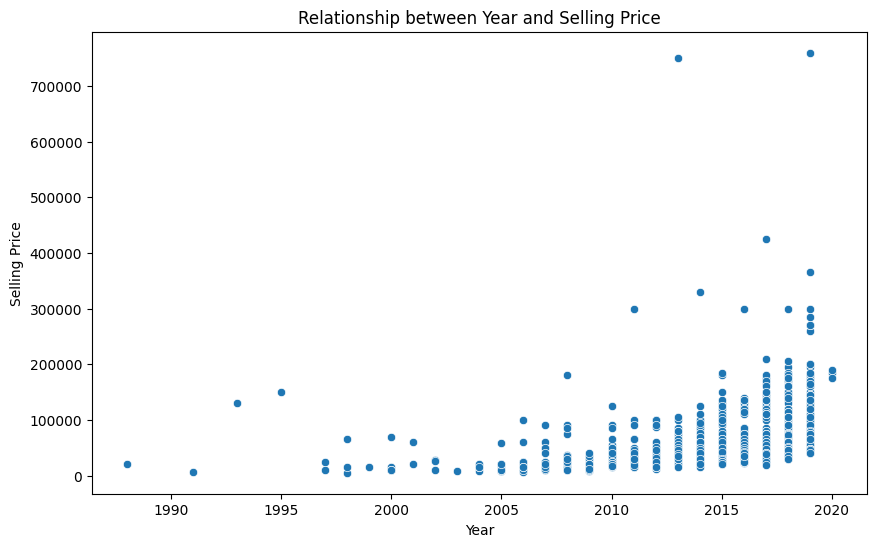

Average depreciation in selling price per year: -6049.382716049383
7      Royal Enfield Bullet 350 [2007-2011]
13                            Yamaha YZF R3
130        Royal Enfield Continental GT 650
134              Harley-Davidson Street Bob
146                              KTM RC 390
242                              KTM RC 390
261           Royal Enfield Interceptor 650
288                              KTM RC 390
289          Kawasaki Ninja 650 [2018-2019]
295                         Suzuki GSX S750
311              Harley-Davidson Street 750
315           Royal Enfield Interceptor 650
344                              BMW G310GS
407           Royal Enfield Interceptor 650
411            KTM 390 Duke ABS [2013-2016]
449           Royal Enfield Classic Signals
860          Kawasaki Ninja 650 [2018-2019]
890            Royal Enfield Classic Chrome
892                            KTM 390 Duke
897                      Kawasaki Ninja 300
Name: name, dtype: object


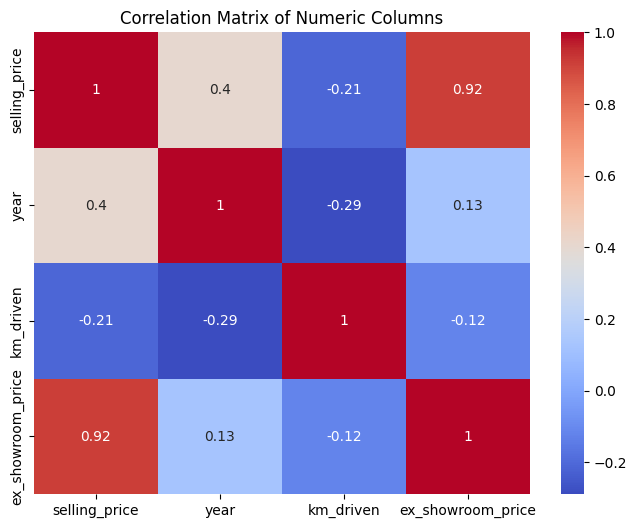

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv("/BIKE DETAILS.csv")
df

price_range = df['selling_price'].max() - df['selling_price'].min()
print(f"The range of selling prices is: {price_range}")

median_price = df['selling_price'].median()
print(f"The median selling price is: {median_price}")

most_common_seller = df['seller_type'].mode()[0]
print(f"The most common seller type is: {most_common_seller}")

bikes_over_50k_km = df[df['km_driven'] > 50000]['km_driven'].count()
print(f"Number of bikes driven over 50,000 km: {bikes_over_50k_km}")

avg_km_by_owner = df.groupby('owner')['km_driven'].mean()
print(avg_km_by_owner)

proportion_older_2015 = df[df['year'] <= 2015].shape[0] / df.shape[0]
print(f"Proportion of bikes from 2015 or older: {proportion_older_2015}")

missing_values = df.isnull().sum()
print(missing_values)

max_ex_showroom_price = df['ex_showroom_price'].max()
bike_with_max_price = df[df['ex_showroom_price'] == max_ex_showroom_price]['name'].iloc[0]
print(f"Highest ex_showroom_price: {max_ex_showroom_price}, Bike: {bike_with_max_price}")

bikes_by_seller = df['seller_type'].value_counts()
print(bikes_by_seller)

first_owner_bikes = df[df['owner'] == '1st owner']
relationship = first_owner_bikes[['selling_price', 'km_driven']].corr()
print(relationship)

Q1 = df['km_driven'].quantile(0.25)
Q3 = df['km_driven'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df_no_outliers = df[(df['km_driven'] >= lower_bound) & (df['km_driven'] <= upper_bound)]

plt.figure(figsize=(10, 6))
sns.scatterplot(x='year', y='selling_price', data=df)
plt.title('Relationship between Year and Selling Price')
plt.xlabel('Year')
plt.ylabel('Selling Price')
plt.show()

current_year = 2023  # Assuming the current year is 2023
df['bike_age'] = current_year - df['year']
avg_depreciation = df.groupby('bike_age')['selling_price'].mean().diff().mean()
print(f"Average depreciation in selling price per year: {avg_depreciation}")

avg_price_by_year = df.groupby('year')['selling_price'].mean()
df['avg_price_for_year'] = df['year'].map(avg_price_by_year)
df['price_diff'] = df['selling_price'] - df['avg_price_for_year']
significantly_above_avg = df[df['price_diff'] > df['price_diff'].std() * 2]['name']
print(significantly_above_avg)

numeric_cols = ['selling_price', 'year', 'km_driven', 'ex_showroom_price']
correlation_matrix = df[numeric_cols].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Numeric Columns')
plt.show()




#EDA - 2
#About - Dataset:

The dataset provided focuses on used car sales, capturing various attributes to analyze the second-hand car market. This dataset provides insights into factors affecting resale value, trends in the used car industry, and consumer behavior.

#Title: Car Sale Dataset

**Source:**

The dataset is available on Kaggle, representing data commonly seen in online car resale platforms.

**Description:**

The dataset contains details about used cars listed for sale, such as brand, model, selling price, kilometers driven, fuel type, and transmission type. This information is valuable for predictive modeling, market analysis, and understanding customer preferences.

#Features:

.Car_id: A unique identifier for each car in the dataset, helping to track individual car entries.

.Date: The date when the car sale transaction took place, formatted as YYYY-MM-DD.

.Customer Name: The name of the customer who purchased the car, represented as a string.

.Gender: The gender of the customer, categorized as "Male" or "Female".

.Annual Income: The customer's annual income in US dollars, represented as a numeric value.

.Dealer_Name: The name of the dealership selling the car, represented as a string.

.Company: The manufacturer or brand name of the car, such as "Toyota," "Ford," etc.

.Model: The specific model name of the car, such as "Corolla," "Civic," etc.

.Engine: The engine type of the car, such as "V6," "I4," etc.

.Transmission: The type of transmission in the car, either "Manual" or "Automatic".

.Color: The color of the car, represented as a string (e.g., "Red," "Blue").

.Price ($): The selling price of the car in US dollars.

.Dealer_No: A unique identifier for each car dealer in the dataset.

.Body Style: The body style of the car, such as "Sedan," "SUV," etc.

.Phone: The phone number of the customer who purchased the car.

.Dealer_Region: The geographical region of the car dealer, such as "North," "South," etc.

#Questions:

1.What is the average selling price of cars for each dealer, and how does it compare across different dealers?

2.Which car brand (Company) has the highest variation in prices, and what does this tell us about the pricing trends?

3.What is the distribution of car prices for each transmission type, and how do the interquartile ranges compare?

4.What is the distribution of car prices across different regions?

5.What is the distribution of cars based on body styles?

6.How does the average selling price of cars vary by customer gender and annual income?

7.What is the distribution of car prices by region, and how does the number of cars sold vary by region?

8.How does the average car price differ between cars with different engine sizes?

9.How do car prices vary based on the customer’s annual income bracket?

10.What are the top 5 car models with the highest number of sales, and how does their price distribution look?

11.How does car price vary with engine size across different car colors, and which colors have the highest price variation?

12.Is there any seasonal trend in car sales based on the date of sale?

13.How does the car price distribution change when considering different combinations of body style and transmission type?

14.What is the correlation between car price, engine size, and annual income of customers, and how do these features interact?

15.How does the average car price vary across different car models and engine types?

Dealer_Name
U-Haul CO                                          28769.919006
Classic Chevy                                      28602.014446
Rabun Used Car Sales                               28527.536177
Iceberg Rentals                                    28522.958533
Enterprise Rent A Car                              28312.580800
Scrivener Performance Engineering                  28297.371589
Gartner Buick Hyundai Saab                         28247.621019
Saab-Belle Dodge                                   28190.139888
Capitol KIA                                        28189.703822
Race Car Help                                      28163.372706
Chrysler of Tri-Cities                             28123.091054
Star Enterprises Inc                               28113.055244
Suburban Ford                                      28112.206758
C & M Motors Inc                                   28111.755200
Tri-State Mack Inc                                 28095.562050
Pars Auto Sales             

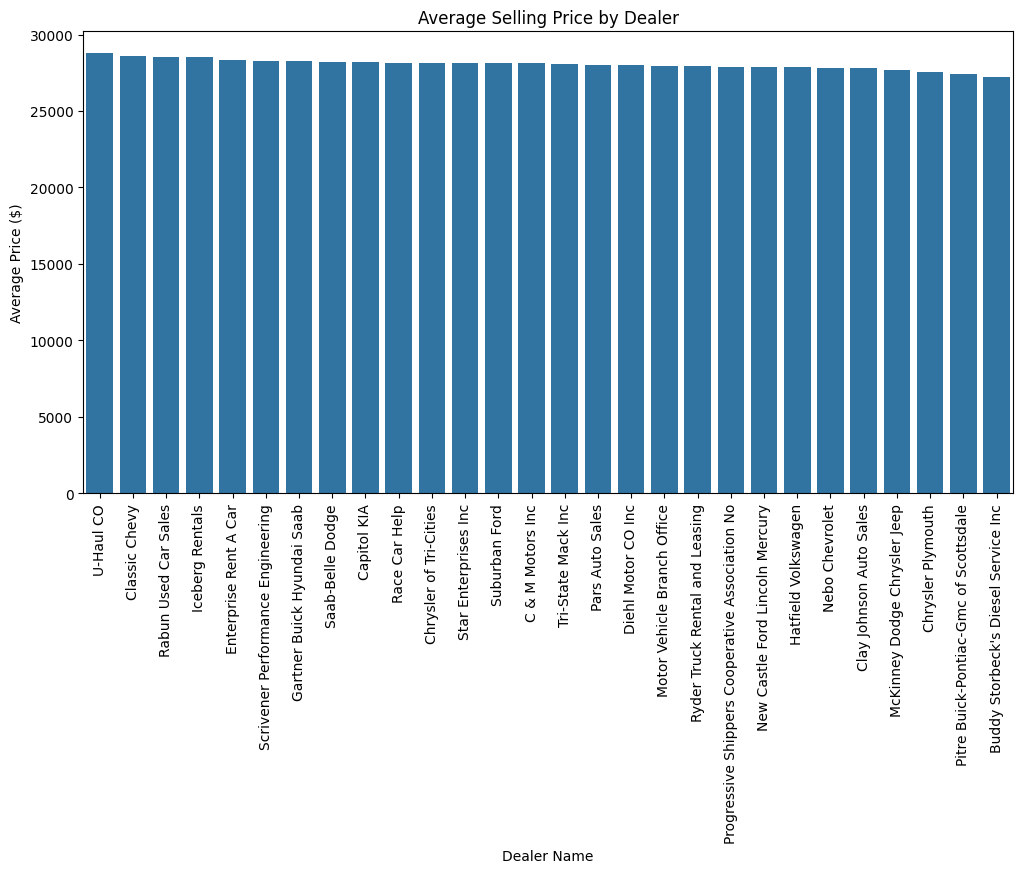

Company
Acura          8183.046414
Audi          12904.243867
BMW           15065.578723
Buick         17142.232626
Cadillac      19517.120220
Chevrolet     13311.063223
Chrysler      11583.286811
Dodge         11187.592085
Ford          15849.090227
Honda         11148.629062
Hyundai        3485.982649
Infiniti      13696.332844
Jaguar        10222.531533
Jeep           9459.834418
Lexus         17852.923492
Lincoln       19658.050211
Mercedes-B    15722.807459
Mercury       16445.172195
Mitsubishi    11671.343035
Nissan        16214.264017
Oldsmobile    15711.345857
Plymouth      19065.997338
Pontiac       14348.963592
Porsche        5261.839206
Saab          19653.740089
Saturn        15990.223671
Subaru        12920.771620
Toyota        15367.131714
Volkswagen    12527.124011
Volvo         12933.790185
Name: Price ($), dtype: float64


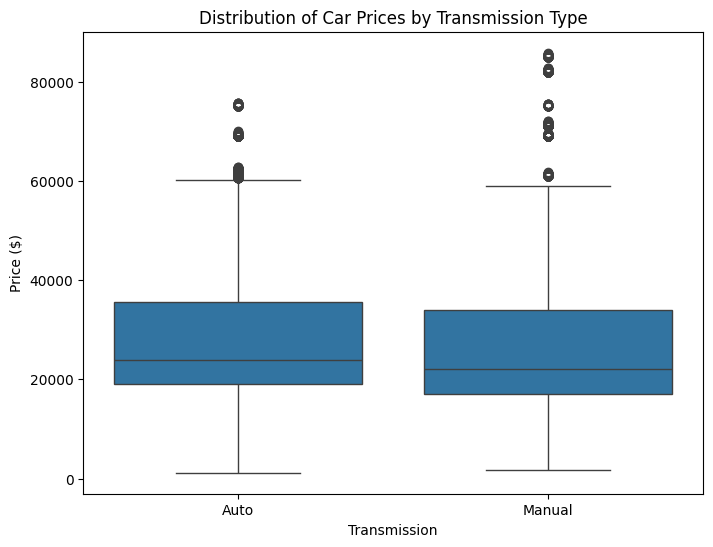

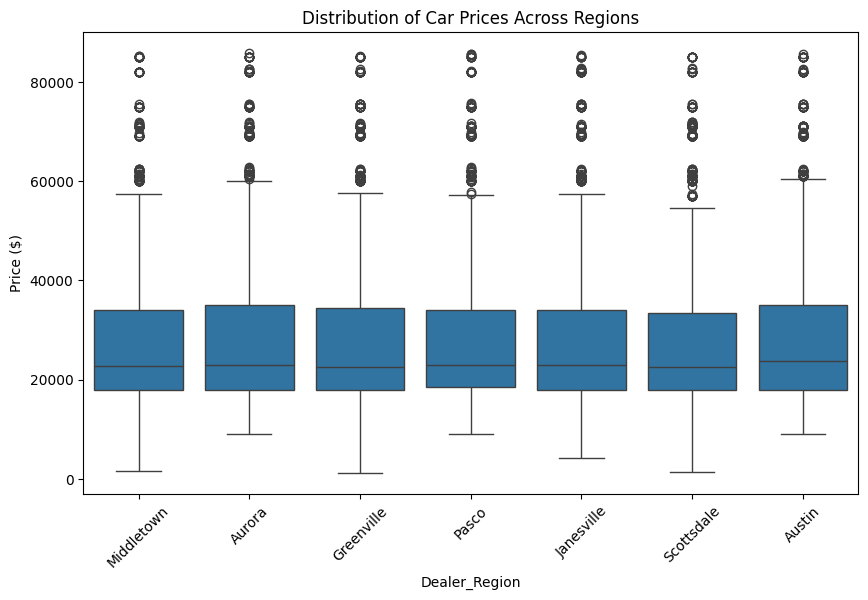

Body Style
SUV          6374
Hatchback    6128
Sedan        4488
Passenger    3945
Hardtop      2971
Name: count, dtype: int64


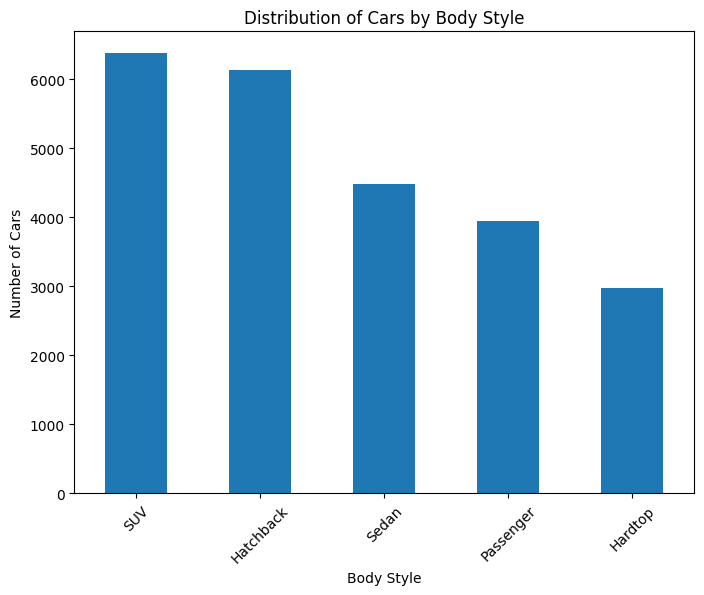

Gender  Annual Income          
Female  (-1109.92, 2248064.0]      28218.888484
        (2248064.0, 4486048.0]     30183.052980
        (4486048.0, 6724032.0]     28318.875000
        (6724032.0, 8962016.0]              NaN
        (8962016.0, 11200000.0]             NaN
Male    (-1109.92, 2248064.0]      27996.376891
        (2248064.0, 4486048.0]     29021.878710
        (4486048.0, 6724032.0]     27520.139535
        (6724032.0, 8962016.0]     40333.333333
        (8962016.0, 11200000.0]    26001.000000
Name: Price ($), dtype: float64


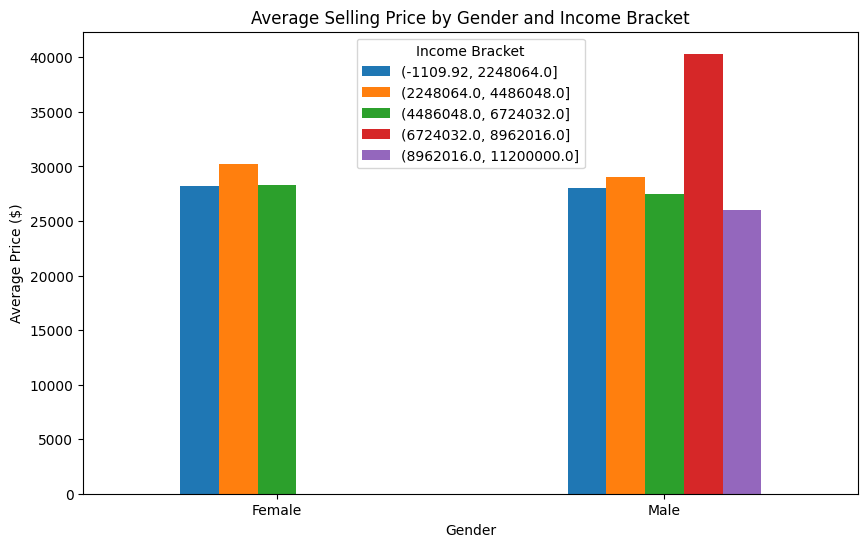

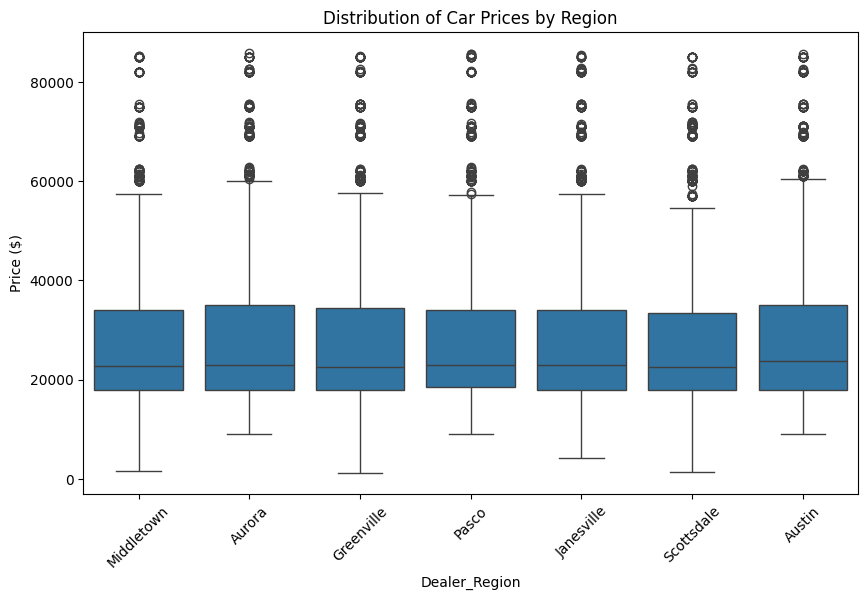

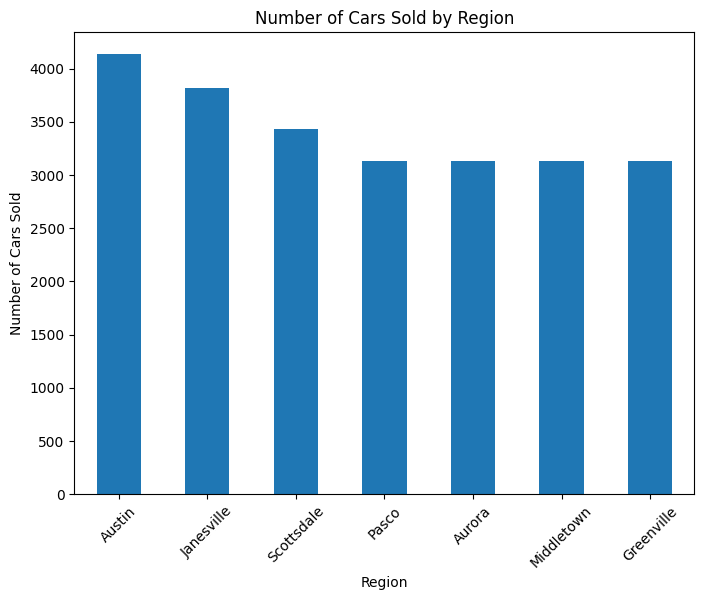

Engine
DoubleÂ Overhead Camshaft    28248.525972
Overhead Camshaft            27914.710631
Name: Price ($), dtype: float64


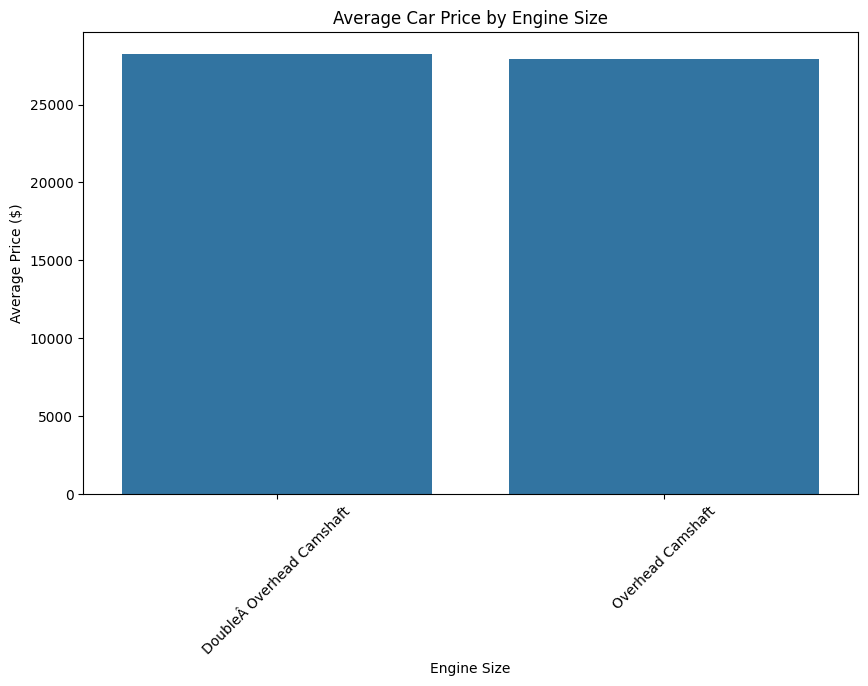

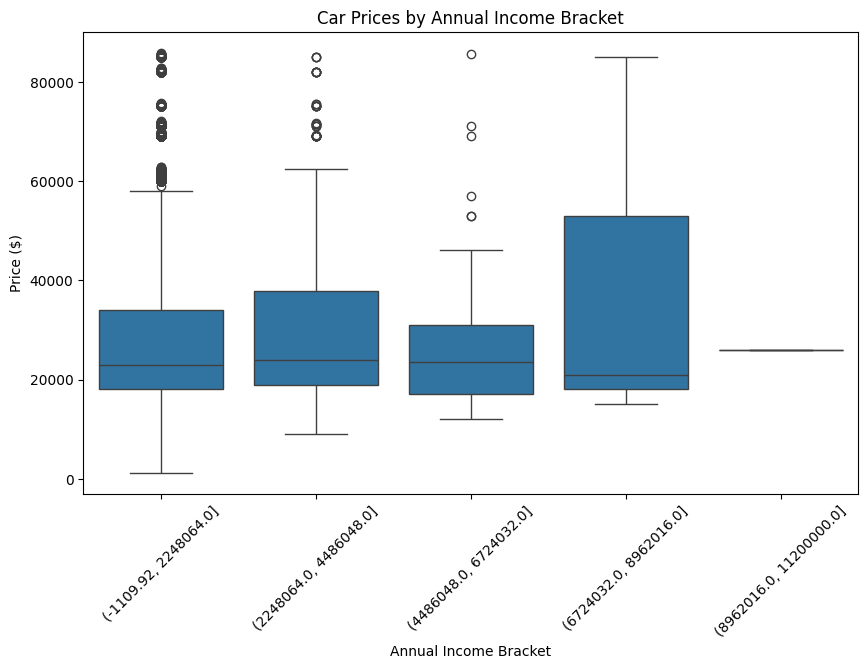

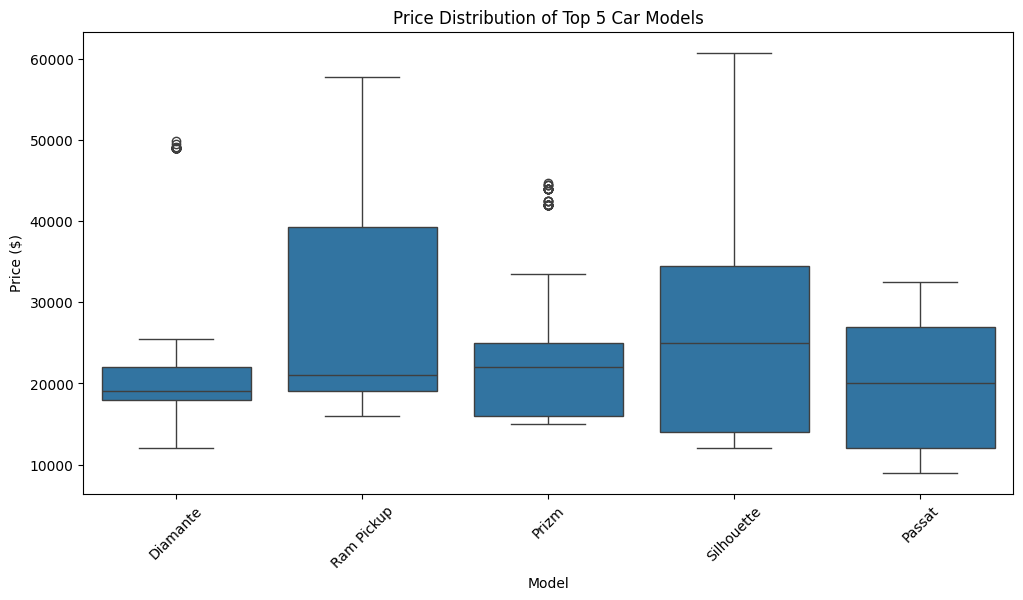

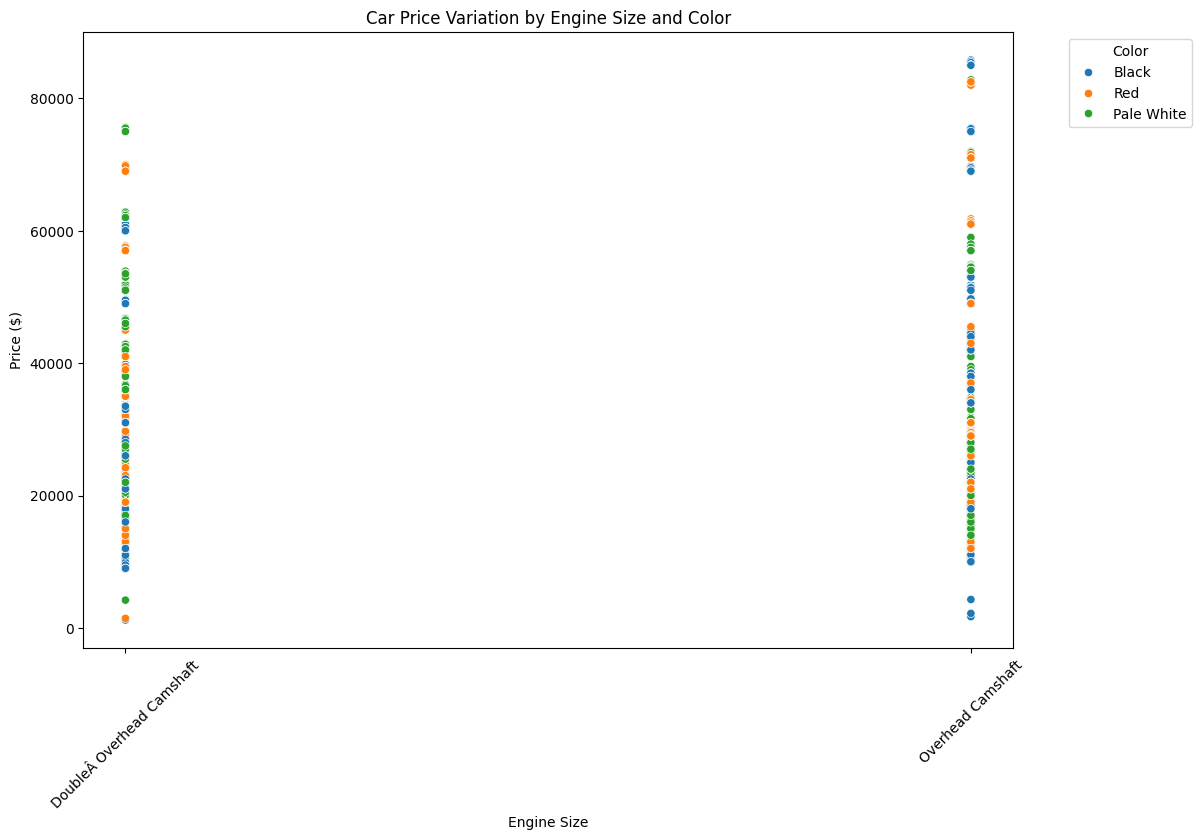

Color
Red           15519.360962
Black         15286.065976
Pale White    14077.346859
Name: Price ($), dtype: float64


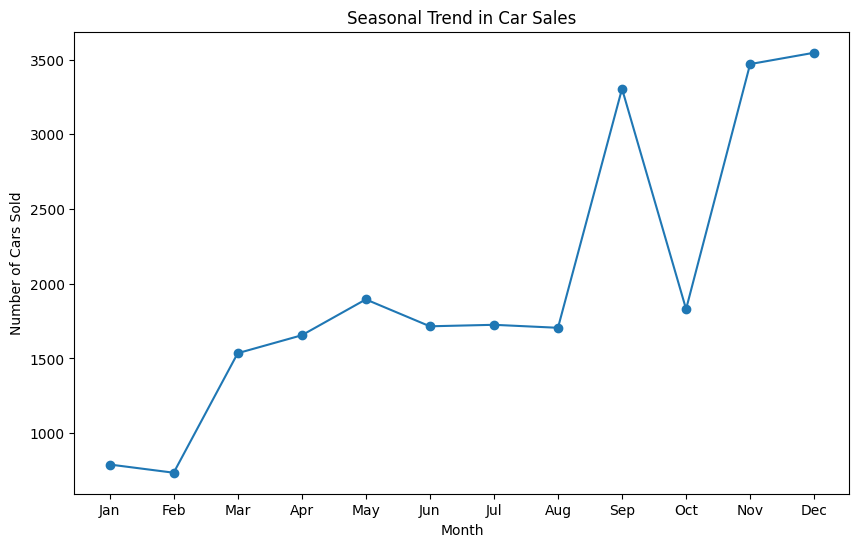

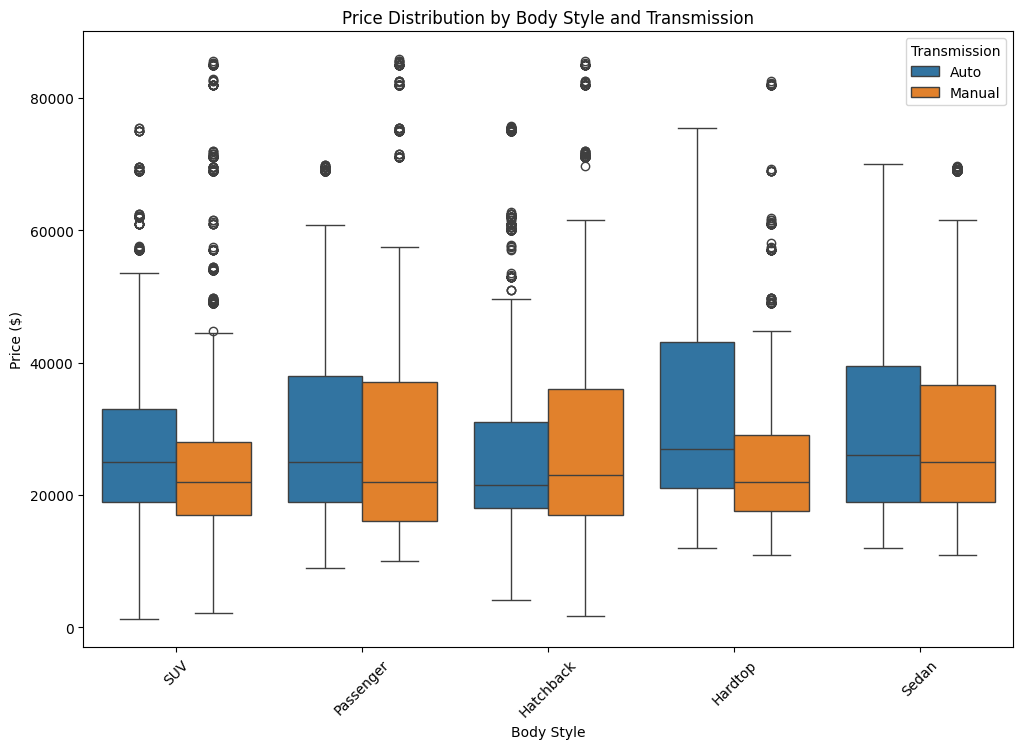

               Price ($)  Annual Income
Price ($)       1.000000       0.012065
Annual Income   0.012065       1.000000


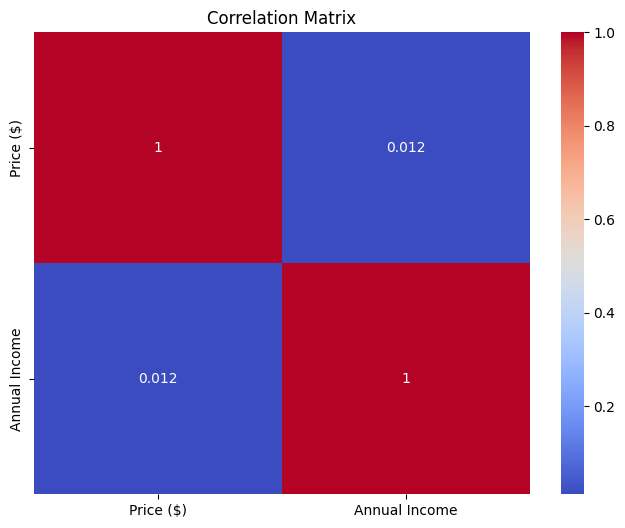

Model     Engine                   
3-Sep     DoubleÂ Overhead Camshaft    37986.380117
3000GT    DoubleÂ Overhead Camshaft    22764.326923
          Overhead Camshaft            21770.659864
300M      DoubleÂ Overhead Camshaft    21394.888889
323i      DoubleÂ Overhead Camshaft    16744.632287
                                           ...     
Windstar  Overhead Camshaft            17100.272727
Wrangler  DoubleÂ Overhead Camshaft    21145.294737
          Overhead Camshaft            18742.942029
Xterra    DoubleÂ Overhead Camshaft    15940.459459
          Overhead Camshaft            31072.500000
Name: Price ($), Length: 261, dtype: float64


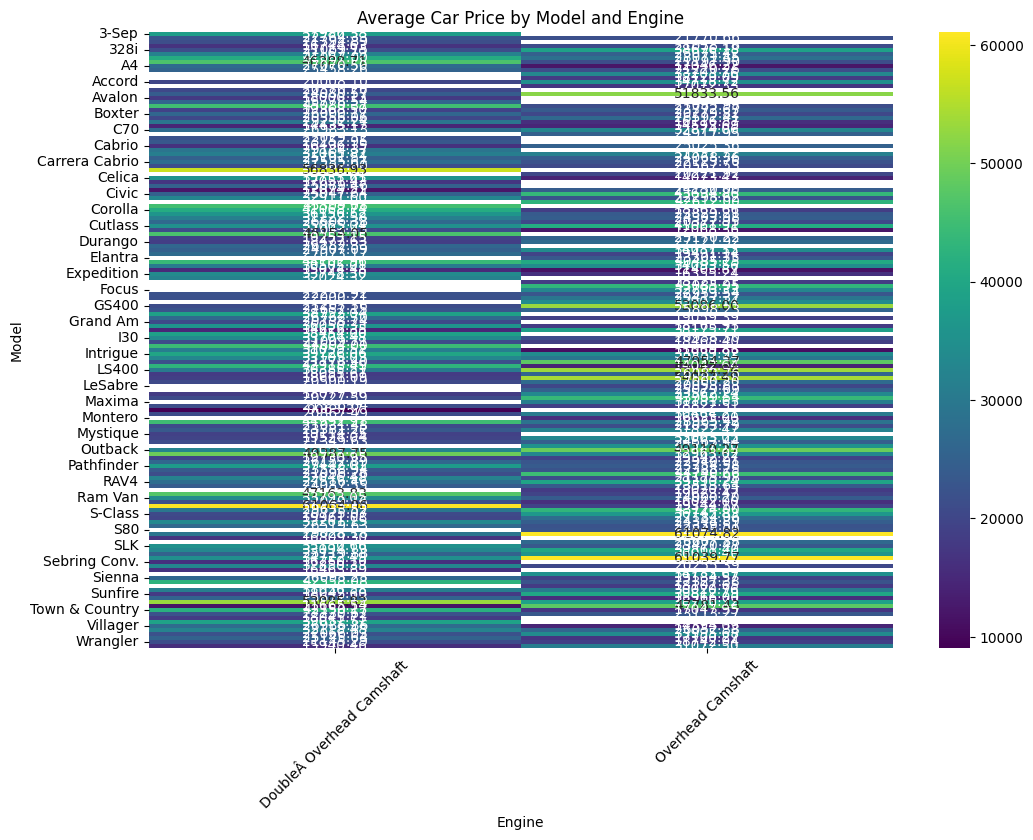

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv("/content/Car Sale.csv")
df

avg_price_by_dealer = df.groupby('Dealer_Name')['Price ($)'].mean().sort_values(ascending=False)
print(avg_price_by_dealer)

# Visualization:
plt.figure(figsize=(12, 6))
sns.barplot(x=avg_price_by_dealer.index, y=avg_price_by_dealer.values)
plt.xticks(rotation=90)
plt.title('Average Selling Price by Dealer')
plt.xlabel('Dealer Name')
plt.ylabel('Average Price ($)')
plt.show()

price_variation_by_brand = df.groupby('Company')['Price ($)'].std()
print(price_variation_by_brand)

plt.figure(figsize=(8, 6))
sns.boxplot(x='Transmission', y='Price ($)', data=df)
plt.title('Distribution of Car Prices by Transmission Type')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='Dealer_Region', y='Price ($)', data=df)
plt.title('Distribution of Car Prices Across Regions')
plt.xticks(rotation=45)
plt.show()

body_style_counts = df['Body Style'].value_counts()
print(body_style_counts)

# Visualization:
plt.figure(figsize=(8, 6))
body_style_counts.plot(kind='bar')
plt.title('Distribution of Cars by Body Style')
plt.xlabel('Body Style')
plt.ylabel('Number of Cars')
plt.xticks(rotation=45)
plt.show()

avg_price_by_gender_income = df.groupby(['Gender', pd.cut(df['Annual Income'], bins=5)])['Price ($)'].mean()
print(avg_price_by_gender_income)

# Visualization:
avg_price_by_gender_income.unstack().plot(kind='bar', figsize=(10, 6))
plt.title('Average Selling Price by Gender and Income Bracket')
plt.xlabel('Gender')
plt.ylabel('Average Price ($)')
plt.xticks(rotation=0)
plt.legend(title='Income Bracket')
plt.show()

# Price Distribution:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Dealer_Region', y='Price ($)', data=df)
plt.title('Distribution of Car Prices by Region')
plt.xticks(rotation=45)
plt.show()

# Sales Distribution:
sales_by_region = df['Dealer_Region'].value_counts()
plt.figure(figsize=(8, 6))
sales_by_region.plot(kind='bar')
plt.title('Number of Cars Sold by Region')
plt.xlabel('Region')
plt.ylabel('Number of Cars Sold')
plt.xticks(rotation=45)
plt.show()

avg_price_by_engine = df.groupby('Engine')['Price ($)'].mean().sort_values(ascending=False)
print(avg_price_by_engine)

# Visualization:
plt.figure(figsize=(10, 6))
sns.barplot(x=avg_price_by_engine.index, y=avg_price_by_engine.values)
plt.title('Average Car Price by Engine Size')
plt.xlabel('Engine Size')
plt.ylabel('Average Price ($)')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x=pd.cut(df['Annual Income'], bins=5), y='Price ($)', data=df)
plt.title('Car Prices by Annual Income Bracket')
plt.xlabel('Annual Income Bracket')
plt.ylabel('Price ($)')
plt.xticks(rotation=45)
plt.show()

top_5_models = df['Model'].value_counts().head(5).index
top_5_models_data = df[df['Model'].isin(top_5_models)]

plt.figure(figsize=(12, 6))
sns.boxplot(x='Model', y='Price ($)', data=top_5_models_data)
plt.title('Price Distribution of Top 5 Car Models')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(12, 8))
sns.scatterplot(x='Engine', y='Price ($)', hue='Color', data=df)
plt.title('Car Price Variation by Engine Size and Color')
plt.xlabel('Engine Size')
plt.ylabel('Price ($)')
plt.xticks(rotation=45)
plt.legend(title='Color', loc='upper right', bbox_to_anchor=(1.2, 1))
plt.show()

# Calculate price variation for each color:
price_variation_by_color = df.groupby('Color')['Price ($)'].std().sort_values(ascending=False)
print(price_variation_by_color)

df['Date'] = pd.to_datetime(df['Date'])
df['Month'] = df['Date'].dt.month

sales_by_month = df.groupby('Month')['Car_id'].count()

plt.figure(figsize=(10, 6))
sales_by_month.plot(kind='line', marker='o')
plt.title('Seasonal Trend in Car Sales')
plt.xlabel('Month')
plt.ylabel('Number of Cars Sold')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()

plt.figure(figsize=(12, 8))
sns.boxplot(x='Body Style', y='Price ($)', hue='Transmission', data=df)
plt.title('Price Distribution by Body Style and Transmission')
plt.xticks(rotation=45)
plt.show()

correlation_matrix = df[['Price ($)',  'Annual Income']].corr()
print(correlation_matrix)

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

avg_price_by_model_engine = df.groupby(['Model', 'Engine'])['Price ($)'].mean()
print(avg_price_by_model_engine)

# Visualization (example with a heatmap):
avg_price_pivot = avg_price_by_model_engine.unstack()
plt.figure(figsize=(12, 8))
sns.heatmap(avg_price_pivot, annot=True, cmap='viridis', fmt=".2f")
plt.title('Average Car Price by Model and Engine')
plt.xlabel('Engine')
plt.ylabel('Model')
plt.xticks(rotation=45)
plt.show()


#EDA - 3
Amazon Sales Data

**Description:**

This dataset contains information on 1K+ Amazon products, including their ratings, reviews, and other details.

**Features:**

product_id: Unique identifier for each product

product_name: Name of the product

category: Category of the product

discounted_price: Discounted price of the product

actual_price: Actual price of the product

discount_percentage: Percentage of discount for the product

rating: Rating of the product (1-5)

rating_count: Number of people who voted for the Amazon rating

about_product: Description about the product

user_id: ID of the user who wrote the review

user_name: Name of the user who wrote the review

review_id: ID of the user review

review_title: Short review

review_content: Long review

img_link: Image link of the product

product_link: Official website link of the product

**Questions:**

1.What is the average rating for each product category?

2.What are the top rating_count products by category?

3.What is the distribution of discounted prices vs. actual prices?

4.How does the average discount percentage vary across categories?

5.What are the most popular product names?

6.What are the most popular product keywords?

7.What are the most popular product reviews?

8.What is the correlation between discounted_price and rating?

9.What are the Top 5 categories based on the highest ratings?

10.Identify any potential areas for improvement or optimization based on the data analysis.


category
Car&Motorbike|CarAccessories|InteriorAccessories|AirPurifiers&Ionizers                                                    3.800000
Computers&Accessories|Accessories&Peripherals|Adapters|USBtoUSBAdapters                                                   4.150000
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCHeadsets                                           3.500000
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCMicrophones                                        3.600000
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCSpeakers                                           4.050000
                                                                                                                            ...   
OfficeProducts|OfficePaperProducts|Paper|Stationery|Pens,Pencils&WritingSupplies|Pens&Refills|GelInkRollerballPens        4.250000
OfficeProducts|OfficePaperProducts|Paper|Stationery|Pens,Pencils&WritingSu

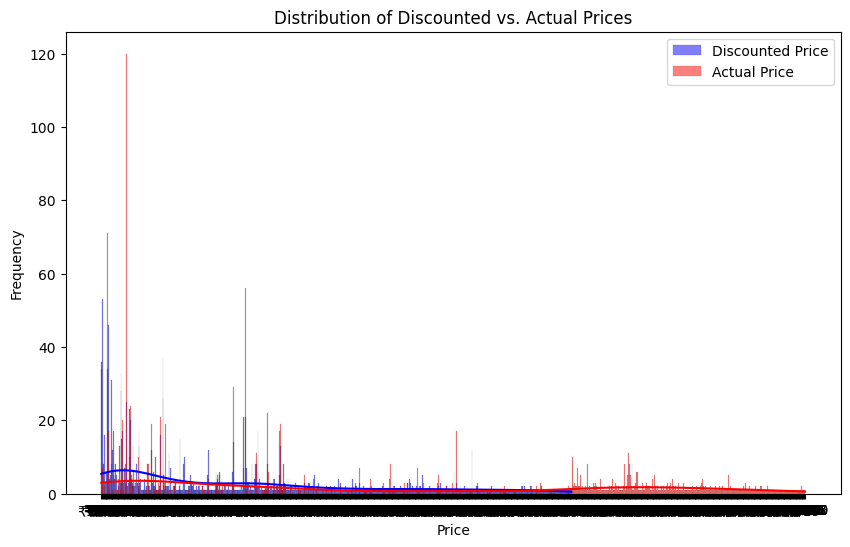

category
Car&Motorbike|CarAccessories|InteriorAccessories|AirPurifiers&Ionizers                                                    42.0
Computers&Accessories|Accessories&Peripherals|Adapters|USBtoUSBAdapters                                                   78.5
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCHeadsets                                           35.0
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCMicrophones                                        56.5
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCSpeakers                                           46.5
                                                                                                                          ... 
OfficeProducts|OfficePaperProducts|Paper|Stationery|Pens,Pencils&WritingSupplies|Pens&Refills|GelInkRollerballPens         0.0
OfficeProducts|OfficePaperProducts|Paper|Stationery|Pens,Pencils&WritingSupplies|Pens&Refills|LiquidIn

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


[('usb', 1011), ('cable', 833), ('charging', 613), ('warranty', 521), ('power', 507), ('design', 468), ('devices', 462), ('use', 459), ('easy', 436), ('type', 422), ('product', 396), ('compatible', 393), ('water', 392), ('charge', 389), ('fast', 377), ('x', 361), ('c', 356), ('data', 338), ('high', 327), ('tv', 325)]
                                           product_name  \
324   REDTECH USB-C to Lightning Cable 3.3FT, [Apple...   
174   Syncwire LTG to USB Cable for Fast Charging Co...   
775   Amazon Basics Wireless Mouse | 2.4 GHz Connect...   
1145  Swiffer Instant Electric Water Heater Faucet T...   
1201  Oratech Coffee Frother electric, milk frother ...   
1299  Instant Pot Air Fryer, Vortex 2QT, Touch Contr...   
249   Sony Bravia 164 cm (65 inches) 4K Ultra HD Sma...   
1388  Campfire Spring Chef Prolix Instant Portable W...   
1226  Zuvexa USB Rechargeable Electric Foam Maker - ...   
459   Spigen EZ Fit Tempered Glass Screen Protector ...   

                               

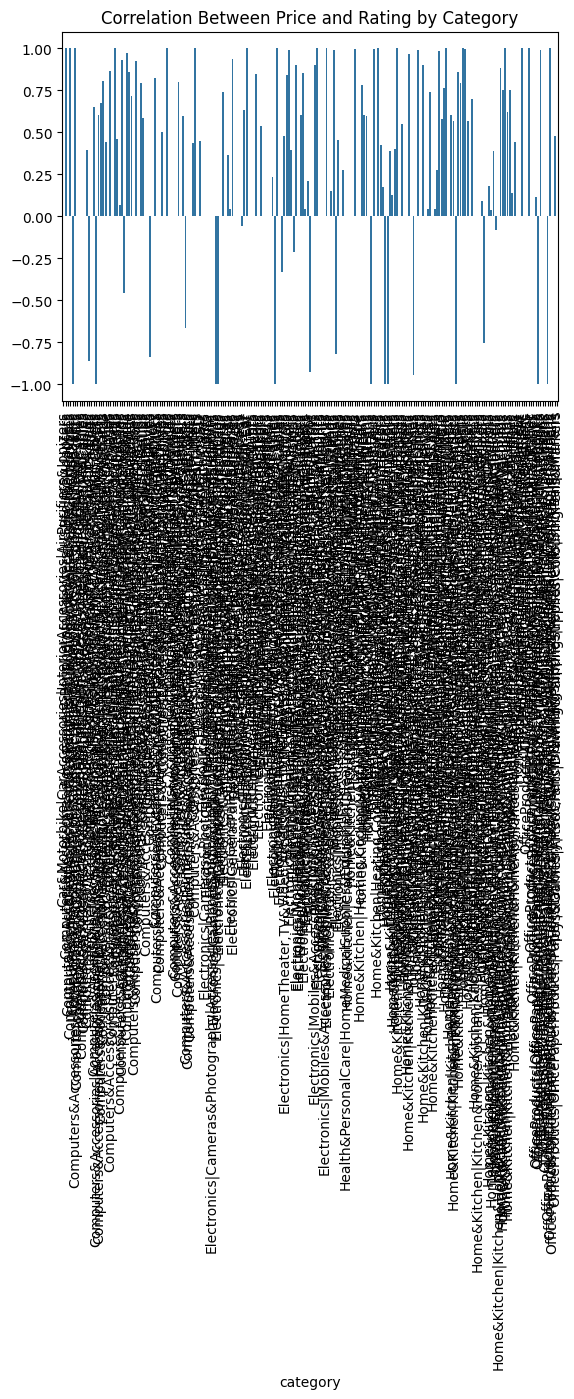

[('usb', 1011), ('cable', 833), ('charging', 613), ('warranty', 521), ('power', 507), ('design', 468), ('devices', 462), ('use', 459), ('easy', 436), ('type', 422), ('product', 396), ('compatible', 393), ('water', 392), ('charge', 389), ('fast', 377), ('x', 361), ('c', 357), ('data', 338), ('high', 327), ('tv', 325)]


In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv("/content/amazon.csv")
df

df['rating'] = pd.to_numeric(df['rating'], errors='coerce')
avg_rating_by_category = df.groupby('category')['rating'].mean()
print(avg_rating_by_category)

top_rated_products = df.sort_values(['category', 'rating_count'], ascending=[True, False]).groupby('category').head(5)
print(top_rated_products[['category', 'product_name', 'rating_count']])

plt.figure(figsize=(10, 6))
sns.histplot(df['discounted_price'], label='Discounted Price', color='blue', kde=True)
sns.histplot(df['actual_price'], label='Actual Price', color='red', kde=True)
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Distribution of Discounted vs. Actual Prices')
plt.legend()
plt.show()

df['discount_percentage'] = df['discount_percentage'].str.rstrip('%').astype(float)
avg_discount_by_category = df.groupby('category')['discount_percentage'].mean()
print(avg_discount_by_category)

popular_products = df['product_name'].value_counts().head(10)
print(popular_products)

import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from collections import Counter

nltk.download('punkt_tab')
nltk.download('stopwords')

# Combine all 'about_product' text into a single string
all_product_text = ' '.join(df['about_product'].astype(str).tolist())

# Tokenize the text
tokens = word_tokenize(all_product_text)

# Remove stop words and punctuation
stop_words = set(stopwords.words('english'))
tokens = [word.lower() for word in tokens if word.isalpha() and word.lower() not in stop_words]

# Count word frequencies
word_counts = Counter(tokens)

# Get the most common keywords
most_common_keywords = word_counts.most_common(20)  # Adjust the number as needed

print(most_common_keywords)

popular_reviews = df.sort_values('rating', ascending=False).head(10)[['product_name', 'review_content', 'rating']]
print(popular_reviews)

df['discounted_price'] = df['discounted_price'].str.replace('₹', '').str.replace(',', '').astype(float)
correlation = df['discounted_price'].corr(df['rating'])
print(f"Correlation between discounted_price and rating: {correlation}")

top_categories = df.groupby('category')['rating'].mean().sort_values(ascending=False).head(5)
print(top_categories)

# Price sensitivity analysis:
import pandas as pd
import seaborn as sns

# Group data by category and calculate the correlation between price and rating
price_rating_corr = df.groupby('category')[['discounted_price', 'rating']].corr().unstack()['rating']['discounted_price']

# Visualize the correlation
sns.barplot(x=price_rating_corr.index, y=price_rating_corr.values)
plt.title('Correlation Between Price and Rating by Category')
plt.xticks(rotation=90)
plt.show()

# Keyword analysis:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from collections import Counter

def extract_keywords(text):
    tokens = word_tokenize(text)
    stop_words = set(stopwords.words('english'))
    keywords = [word.lower() for word in tokens if word.isalpha() and word.lower() not in stop_words]
    return keywords

# Apply keyword extraction to the 'about_product' column
df['keywords'] = df['about_product'].apply(extract_keywords)

# Aggregate keywords and count frequencies
all_keywords = [keyword for sublist in df['keywords'] for keyword in sublist]
keyword_counts = Counter(all_keywords)

# Get the most common keywords
most_common_keywords = keyword_counts.most_common(20)
print(most_common_keywords)




#EDA-4

**Description of the Dataset:**

The dataset titled "Spotify Data: Popular Hip-hop Artists and Tracks" provides a curated collection of
approximately 500 entries showcasing the vibrant realm of hip-hop music. These entries meticulously compile
the most celebrated hip-hop tracks and artists, reflecting their significant influence on the genre's landscape. Each entry not only highlights the popularity and musical composition of the tracks but also underscores the creative prowess of the artists and their profound impact on global listeners.


**Application in Data Science:**

This dataset serves as a valuable resource for various data science explorations. Analysts can delve into trend analysis to discern the popularity dynamics of hit hip-hop tracks over recent years. Additionally, the dataset enables network analysis to uncover collaborative patterns among top artists, shedding light on the genre's evolving collaborative landscape. Furthermore, it facilitates the development of predictive models aimed at forecasting track popularity based on diverse features, offering insights for artists, producers, and marketers.

**Column Descriptors:**

Artist: The name of the artist, providing direct attribution to the creative mind behind the track.

Track Name: The title of the track, encapsulating its identity and essence.

Popularity: A numeric score reflecting the track's reception and appeal among Spotify listeners.

Duration (ms): The track's length in milliseconds, detailing the temporal extent of the musical experience.

Track ID: A unique identifier within Spotify's ecosystem, enabling direct access to the track for further
exploration.


**Questions:**

1.Read the dataframe, check null value if present then do the needful, check duplicate row , if present then do the needful.

2.What is the distribution of popularity among the tracks in the dataset? Visualize it using a histogram.

3.Is there any relationship between the popularity and the duration of tracks? Explore this using a scatter plot.

4.Which artist has the highest number of tracks in the dataset? Display the count of tracks for each artist using a countplot.

5.What are the top 5 least popular tracks in the dataset? Provide the artist name and track name for each.

6.Among the top 5 most popular artists, which artist has the highest popularity on average? Calculate and
display the average popularity for each artist.

7.For the top 5 most popular artists, what are their most popular tracks? List the track name for each artist.

8.Visualize relationships between multiple numerical variables simultaneously using a pair plot.

9.Does the duration of tracks vary significantly across different artists? Explore this visually using a box plot or violin plot.

10.How does the distribution of track popularity vary for different artists? Visualize this using a swarm plot or a violin plot.

Null Values:
 Artist           0
Track Name       0
Popularity       0
Duration (ms)    0
Track ID         0
dtype: int64
Duplicate Rows: 27


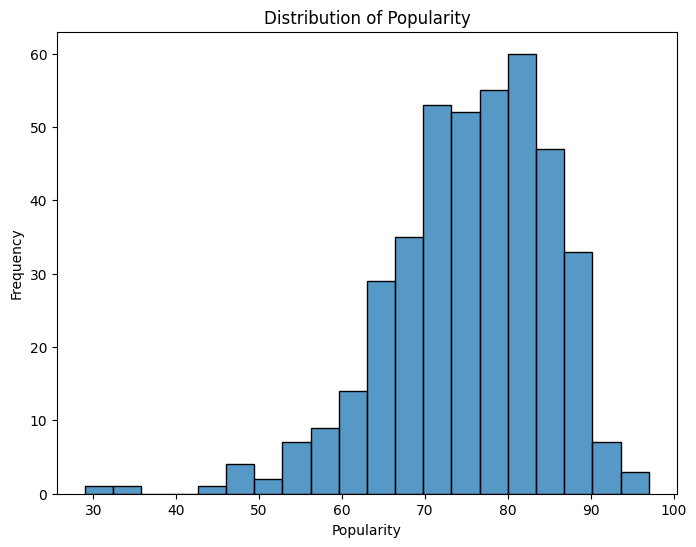

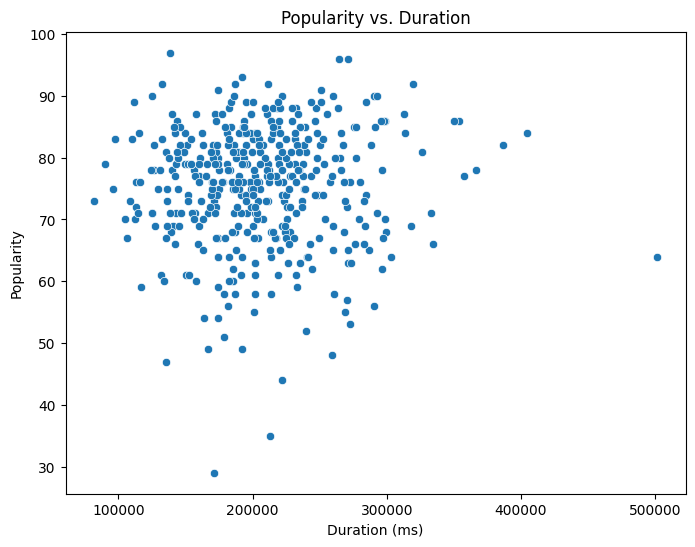

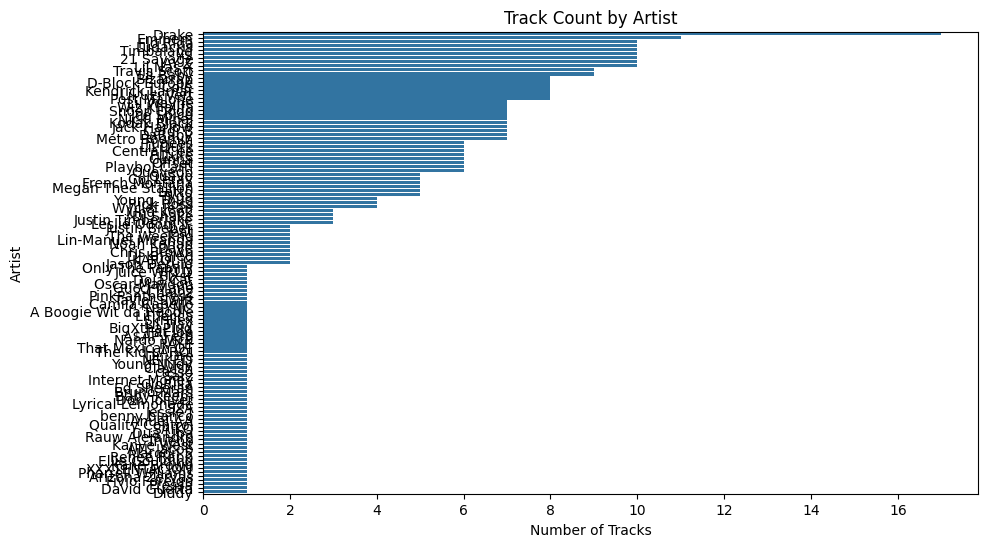

Top 5 Least Popular Tracks:
              Artist                     Track Name
207          Pressa  Attachments (feat. Coi Leray)
231   Justin Bieber                     Intentions
413  French Montana                Splash Brothers
225        Lil Baby                  On Me - Remix
407     Wyclef Jean      911 (feat. Mary J. Blige)
Average Popularity of Top 5 Artists:
 Artist
Drake        82.882353
Eminem       83.636364
Flo Rida     78.000000
Ludacris     63.000000
Timbaland    69.000000
Name: Popularity, dtype: float64
Most Popular Track for Drake: Rich Baby Daddy (feat. Sexyy Red & SZA)
Most Popular Track for Eminem: Without Me
Most Popular Track for Flo Rida: Low (feat. T-Pain)
Most Popular Track for Ludacris: My Chick Bad
Most Popular Track for Timbaland: The Way I Are


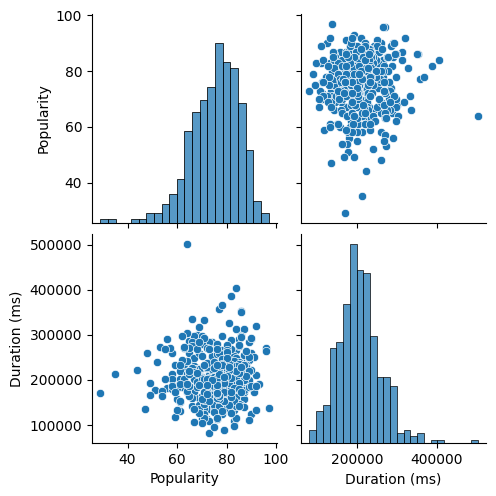

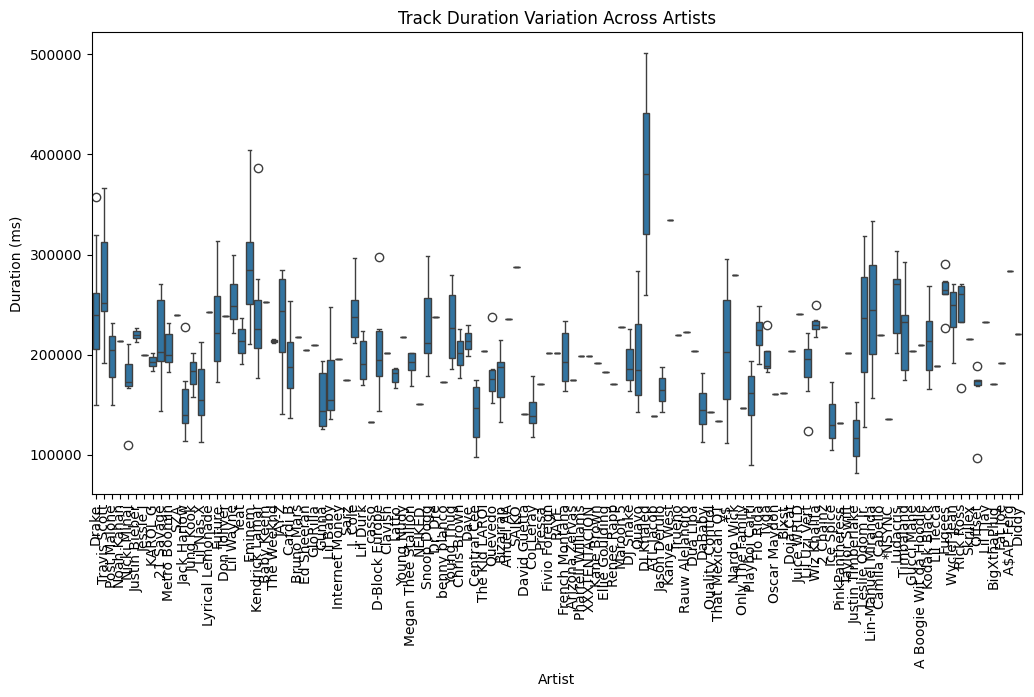

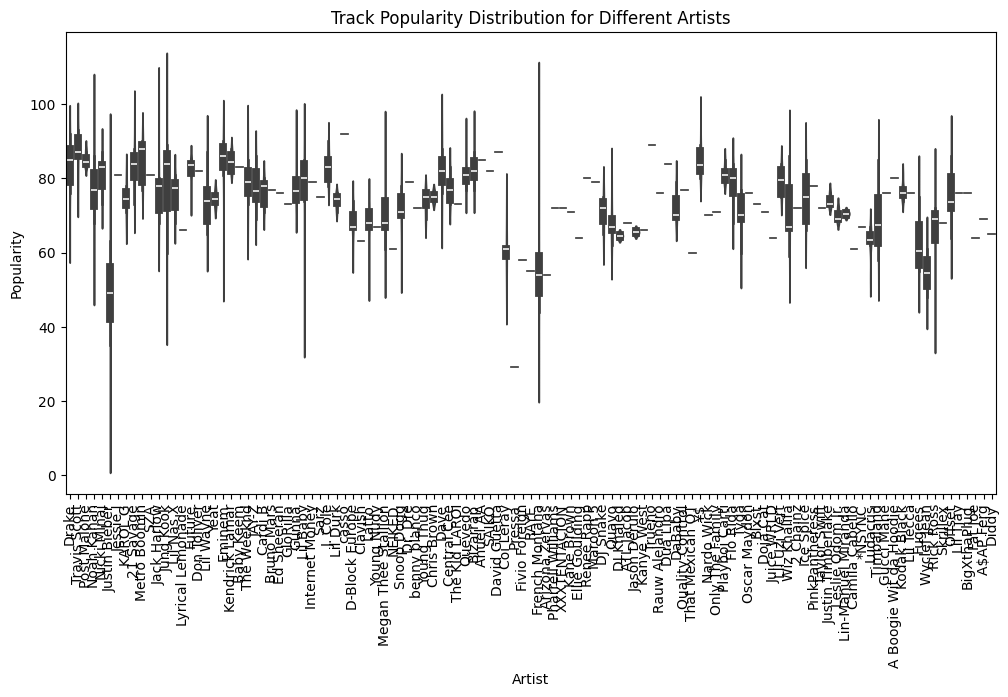

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv("/content/spotify.csv")
df

import pandas as pd

# Read the dataframe
df = pd.read_csv("/content/spotify.csv")

# Check for null values
null_values = df.isnull().sum()
print("Null Values:\n", null_values)

# If null values are present, you can handle them using methods like:
# df.fillna(0, inplace=True)  # Replace with 0
# df.dropna(inplace=True)  # Remove rows with null values

# Check for duplicate rows
duplicate_rows = df.duplicated().sum()
print("Duplicate Rows:", duplicate_rows)

# If duplicate rows are present, you can remove them using:
df.drop_duplicates(inplace=True)

import matplotlib.pyplot as plt
import seaborn as sns

# Histogram of popularity
plt.figure(figsize=(8, 6))
sns.histplot(df['Popularity'], bins=20)
plt.title('Distribution of Popularity')
plt.xlabel('Popularity')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(8, 6))
sns.scatterplot(x='Duration (ms)', y='Popularity', data=df)
plt.title('Popularity vs. Duration')
plt.xlabel('Duration (ms)')
plt.ylabel('Popularity')
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(y='Artist', data=df, order=df['Artist'].value_counts().index)
plt.title('Track Count by Artist')
plt.xlabel('Number of Tracks')
plt.ylabel('Artist')
plt.show()

least_popular_tracks = df.sort_values('Popularity').head(5)
print("Top 5 Least Popular Tracks:\n", least_popular_tracks[['Artist', 'Track Name']])

top_5_artists = df['Artist'].value_counts().head(5).index
avg_popularity = df[df['Artist'].isin(top_5_artists)].groupby('Artist')['Popularity'].mean()
print("Average Popularity of Top 5 Artists:\n", avg_popularity)

for artist in top_5_artists:
    most_popular_track = df[df['Artist'] == artist].sort_values('Popularity', ascending=False).head(1)
    print(f"Most Popular Track for {artist}: {most_popular_track['Track Name'].iloc[0]}")

sns.pairplot(df[['Popularity', 'Duration (ms)']])
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(x='Artist', y='Duration (ms)', data=df)  # Or sns.violinplot(...)
plt.title('Track Duration Variation Across Artists')
plt.xlabel('Artist')
plt.ylabel('Duration (ms)')
plt.xticks(rotation=90)
plt.show()

plt.figure(figsize=(12, 6))
sns.violinplot(x='Artist', y='Popularity', data=df)  # Or sns.swarmplot(...)
plt.title('Track Popularity Distribution for Different Artists')
plt.xlabel('Artist')
plt.ylabel('Popularity')
plt.xticks(rotation=90)
plt.show()
